In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
curr_dir = os.getcwd()
path = os.path.join(curr_dir, '../train.csv')
data = pd.read_csv(path)

data = np.array(data)
m, n = data.shape # m is the rows, n is columns
np.random.shuffle(data)

X_train = torch.from_numpy(data[:, 1:] / 255.).float()
Y_train = torch.from_numpy(data[:, 0]).long()

In [3]:
# Autoencoder settings
n_inputs = 784
n_hidden = 64  # codings
n_outputs = n_inputs

In [4]:
def init_params():
    w1 = torch.randn(n_inputs, n_hidden)
    b1 = torch.zeros(n_hidden)
    w2 = torch.randn(n_hidden, n_outputs)
    b2 = torch.zeros(n_outputs)
    return w1, b1, w2, b2

In [5]:
def forward_prop(X, w1, b1, w2, b2):
    Z1 = X @ w1 + b1
    A1 = torch.sigmoid(Z1)  # codings
    Z2 = A1 @ w2 + b2
    A2 = torch.sigmoid(Z2)  # reconstructed inputs
    return Z1, A1, Z2, A2

In [6]:
def backward_prop(X, Z1, A1, Z2, A2, w1, w2):
    dZ2 = (A2 - X) * A2 * (1 - A2)
    dw2 = A1.t() @ dZ2
    db2 = torch.sum(dZ2, axis=0)
    dZ1 = dZ2 @ w2.t() * A1 * (1 - A1)
    dw1 = X.t() @ dZ1
    db1 = torch.sum(dZ1, axis=0)
    return dw1, db1, dw2, db2

In [7]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [8]:
def train_autoencoder(X, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for iteration in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = backward_prop(X, Z1, A1, Z2, A2, w1, w2)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if iteration % 50 == 0:
            print(f"Iteration: {iteration}")
    return w1, b1, w2, b2

In [9]:
w1, b1, w2, b2 = train_autoencoder(X_train, 0.01, 50)

Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Iteration: 250
Iteration: 300
Iteration: 350
Iteration: 400
Iteration: 450
Iteration: 500
Iteration: 550
Iteration: 600
Iteration: 650
Iteration: 700
Iteration: 750
Iteration: 800
Iteration: 850
Iteration: 900
Iteration: 950


In [14]:
def generate_images(w1, b1, w2, b2, n):
    # Generate n random codings
    codings = torch.randn(n, n_hidden)
    
    # Pass the codings through the decoder
    Z2 = codings @ w2 + b2
    images = torch.sigmoid(Z2)
    
    # Plot the images
    fig, axes = plt.subplots(1, n, figsize=(n, 1))
    for image, ax in zip(images, axes):
        ax.imshow(image.detach().numpy().reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()


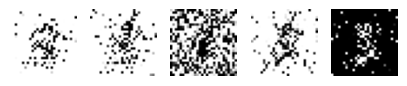

In [15]:
generate_images(w1, b1, w2, b2, 5)